Walk 1 - Max |x|: 17, Max |y|: 22, Final Point: (11, 17)
Walk 2 - Max |x|: 29, Max |y|: 17, Final Point: (-28, 10)
Walk 3 - Max |x|: 29, Max |y|: 38, Final Point: (-26, -36)
Walk 4 - Max |x|: 31, Max |y|: 16, Final Point: (-21, 15)
Walk 5 - Max |x|: 21, Max |y|: 37, Final Point: (21, 33)
Walk 6 - Max |x|: 29, Max |y|: 13, Final Point: (22, 12)
Walk 7 - Max |x|: 23, Max |y|: 28, Final Point: (-8, -14)
Walk 8 - Max |x|: 15, Max |y|: 37, Final Point: (11, -13)
Walk 9 - Max |x|: 17, Max |y|: 9, Final Point: (-6, 0)
Walk 10 - Max |x|: 19, Max |y|: 14, Final Point: (2, -10)
Walk 11 - Max |x|: 20, Max |y|: 9, Final Point: (18, -6)
Walk 12 - Max |x|: 21, Max |y|: 16, Final Point: (-12, -14)
Walk 13 - Max |x|: 13, Max |y|: 13, Final Point: (0, -8)
Walk 14 - Max |x|: 17, Max |y|: 19, Final Point: (-3, 11)
Walk 15 - Max |x|: 29, Max |y|: 28, Final Point: (-23, -25)
Walk 16 - Max |x|: 24, Max |y|: 18, Final Point: (-16, 16)
Walk 17 - Max |x|: 37, Max |y|: 35, Final Point: (27, -35)
Walk 18 - Max |

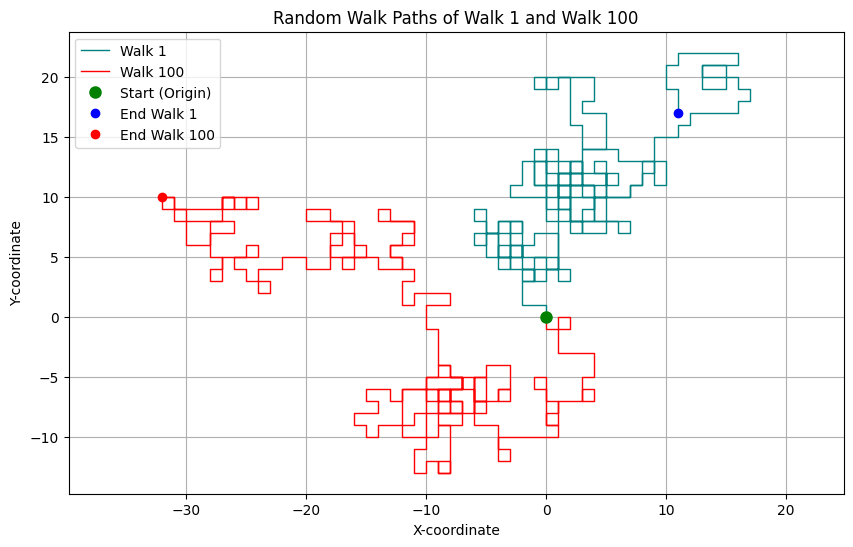

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Establish number of walks and steps per walk.
num_walks = 100
steps_per_walk = 350

# Create lists to store final destinations and paths.
x_destinations = []
y_destinations = []
all_x_paths = []  # List to hold all x-paths (one per walk)
all_y_paths = []  # List to hold all y-paths (one per walk)

# Possible moves (up, down, left, right).
moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]

for walk in range(num_walks):
    x_path = [0]  # Start at origin for this walk
    y_path = [0]
    x, y = 0, 0
    prev_x, prev_y = 0, 0

    for _ in range(steps_per_walk):
        # Get valid moves (exclude the reverse of the last move).
        valid_moves = [move for move in moves if not (move[0] == -(x - prev_x) and move[1] == -(y - prev_y))]
        dx, dy = random.choice(valid_moves)
       
        # Update position.
        prev_x, prev_y = x, y
        x += dx
        y += dy
       
        # Store path.
        x_path.append(x)
        y_path.append(y)

    # Store final destination and entire path for this walk.
    x_destinations.append(x)
    y_destinations.append(y)
    all_x_paths.append(x_path)  # Append the full x-path list
    all_y_paths.append(y_path)  # Append the full y-path list

# Calculate the true maximum distances from all paths.
max_x_traveled = 0
max_y_traveled = 0
for i, (x_path, y_path) in enumerate(zip(all_x_paths, all_y_paths)):
    path_max_x = max(abs(x) for x in x_path)
    path_max_y = max(abs(y) for y in y_path)
    max_x_traveled = max(max_x_traveled, path_max_x)
    max_y_traveled = max(max_y_traveled, path_max_y)
    print(f"Walk {i + 1} - Max |x|: {path_max_x}, Max |y|: {path_max_y}, Final Point: ({x_path[-1]}, {y_path[-1]})")

# Calculate mean and standard deviation.
def mean(data):
    return sum(data) / len(data)

def std_dev(data, mean_val):
    variance = sum((x - mean_val) ** 2 for x in data) / len(data)
    return math.sqrt(variance)

x_mean = mean(x_destinations)
x_std = std_dev(x_destinations, x_mean)
y_mean = mean(y_destinations)
y_std = std_dev(y_destinations, y_mean)

# Output results.
print(f"Output (I): absolute max x traveled in all random walks: {max_x_traveled}")
print(f"Output (II): absolute max y traveled in all random walks: {max_y_traveled}")
print(f"Output (III): The mean and standard deviation of all 100 of the destinations in the x dimension: mean = {x_mean:.2f}, std dev = {x_std:.2f}")
print(f"Output (IV): The mean and standard deviation of all 100 destinations in the y dimension: mean = {y_mean:.2f}, std dev = {y_std:.2f}")

# Plotting the paths of Walk 1 and Walk 100.
plt.figure(figsize=(10, 6))
plt.plot(all_x_paths[0], all_y_paths[0], label='Walk 1', color='teal', linewidth=1)
plt.plot(all_x_paths[99], all_y_paths[99], label='Walk 100', color='red', linewidth=1)

# Add starting point and endpoints.
plt.plot(0, 0, 'go', label='Start (Origin)', markersize=8)  # Green dot for start
plt.plot(all_x_paths[0][-1], all_y_paths[0][-1], 'bo', label='End Walk 1', markersize=6)  # Blue dot for Walk 1 end
plt.plot(all_x_paths[99][-1], all_y_paths[99][-1], 'ro', label='End Walk 100', markersize=6)  # Red dot for Walk 100 end

# Set axis limits based on calculated maxima with padding.
plt.xlim(-max_x_traveled - 5, max_x_traveled + 5)
plt.ylim(-max_y_traveled - 5, max_y_traveled + 5)

plt.title('Random Walk Paths of Walk 1 and Walk 100')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio to avoid distortion
plt.show()